<a href="https://colab.research.google.com/github/kim-daehyun/study_trace/blob/Computer-Statistics/05_One_sample_t_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy import stats
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

# Example

In [ ]:
# And, here is a sample and 
# you want to test if the population where the sample is from has a mean of 4.5.
mu = 4.5

sample = [3.7, 4.9, 4.5, 4.5, 3.1, 4.0, 2.7, 3.5, 6.3, 3.7,
           3.5, 4.0, 4.1, 5.5, 4.3, 5.2, 3.1, 3.0, 3.7, 2.6]

# Calculate the sample statistics
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof = 1 )

print("Mean: {}".format(sample_mean))
print("Standard Deviation (Unbiased): {}".format(sample_std))  

# Let's check the significance of the difference by the one-sample t-test.

Mean: 3.9949999999999997
Standard Deviation (Unbiased): 0.9577797791053838


# Step 1. Define null and alternative hypotheses

In [ ]:
# H0 : mu = 4.5
print("H0: The population mean is 4.5.")

# H1 : mu != 4.5
print("H1: The population mean is not equal to 4.5.")

H0: The population mean is 4.5.
H1: The population mean is not equal to 4.5.


# Step 2. Calculate a test statistic

In [ ]:
# t = (sample_mean - mu) / std_error

sample_error = sample_mean - mu
standard_error = sample_std / np.sqrt(len(sample))

t = sample_error / standard_error

print("Test statistic t: {}".format(t))

Test statistic t: -2.357983230116091


# Step 3. Check how likely the test statistic can be obtained.

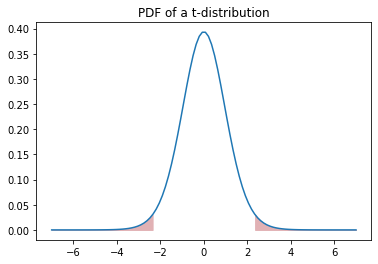

In [ ]:
# The t-statistic follows t-distribution.
# The t-distribution is described by DF of a sample.
t_dist = stats.t(df = len(sample)-1) 
x = np.linspace(-7, 7, 100)  
y = t_dist.pdf(x)      
plt.plot(x, y)  
plt.title("PDF of a t-distribution") 

# Fill the area of the values to be 
# as extreme as or more extreme than the test statistic. (p-value)
right_interval = np.linspace(abs(t), x[-1], 50) 
left_interval = np.linspace(-x[-1], -abs(t), 50) 
plt.fill_between( right_interval, t_dist.pdf(right_interval) , color='#e1b1b4', alpha=1)
plt.fill_between( left_interval, t_dist.pdf(left_interval) , color='#e1b1b4', alpha=1)
plt.show()

In [ ]:
# Calculate the p-value.
p, _ = integrate.quad(t_dist.pdf, left_interval[0], left_interval[-1]) #  Arg: function, from_value, to_value 
p *= 2 # two-tailed

print("The p-value for this test: {}".format(p))

The p-value for this test: 0.02924414642792712


In [ ]:
# Conclusion (Significance level = 5%)
if p < 0.05:
  print("Reject H0: The population mean is not equal to 4.5.")
else:
  print("Accept H0: The population mean is 4.5.")

Reject H0: The population mean is not equal to 4.5.


##### [Additional] You can calculate the p-value by the SF. 

In [ ]:
p = t_dist.sf( abs(t) ) * 2
print("p-value : {0}".format(p))

### Or you can use codes in the 'stats' module.

In [ ]:
t_, p_ = stats.ttest_1samp(sample, mu)
print("Test statistic t: {}".format(t_))
print("p-value: {}".format(p_))

Test statistic t: -2.357983230116091
p-value: 0.02924529358349075


In [ ]:
cv = t_dist.ppf(.975)
print("Critical values (alpha = 0.05): -{0}, {0}".format(cv))

# If the test statistic is beyond the critical values, 
# we should reject the null hypothesis.

Critical values (alpha = 0.05): -2.093024054408263, 2.093024054408263


# (Step 4) Calculate the effect size

In [ ]:
# The effect size for one-sample t-test is cohen's d.
# d = | sample_mean - mu | / sample_std

d = abs(sample_mean - 4.5) / sample_std

print("Effect size: {}".format(d))

Effect size: 0.5272610792344109
